# MCNP Output

- function to get the output: /Users/hkromer/02_PhD/02_Data/07.neutron_output/MCNP_neutron_output/fun_getNeutronOutputPer100muSv.py

In [27]:
import sys
sys.path.insert(0, '/Users/hkromer/02_PhD/02_Data/07.neutron_output/MCNP_neutron_output/')

from fun_getNeutronOutputPer100muSv import getNeutronOutputPer100muSv 

In [28]:
?getNeutronOutputPer100muSv

Signature:
getNeutronOutputPer100muSv(
    HV=100,
    LB6411_distance=70,
    LB6411_direction='W',
    newTarget=1,
    master_path='/Users/hkromer/02_PhD/02_Data/07.neutron_output/MCNP_neutron_output/',
)
Docstring:
Retrieves the neutron output per 100µSv/h as determined from MCNP. Only works for the new target. Returns that value
HV: High voltage. This determines which MCNP run is taken to load the data. Default is -100 kV
LB6411_distance IN WEST DIRECTION (+y): Distance between the source and LB6411 position. Default is 70 cm
LB6411_direction: Direction where the LB6411 is placed in
newTarget: if 1, then the files for the new target are used, 0 the files for the old target are used
master_path: path where the output csv files are stored
returns neutron output per 100 µSv/hr as read by the LB6411
File:      ~/02_PhD/02_Data/07.neutron_output/MCNP_neutron_output/fun_getNeutronOutputPer100muSv.py
Type:      function


In [29]:
import time
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import AutoMinorLocator
import re

import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

## Plot the output

- Deuterium energy is 100 keV

In [30]:
fname = '/Users/hkromer/02_PhD/02_Data/07.neutron_output/MCNP_neutron_output/MCNP_results_newTarget/df_ID234_neutron_output_for_Edeut_100.csv'
df = pd.read_csv(fname, index_col=0)
df = df[(df.index >25)& (df.index <210)]
df.head()

,N,S,W,E
distance,,,,
30,3.397686e+05,4.658116e+05,3.923961e+05,3.965172e+05
35,4.365673e+05,5.411429e+05,5.127659e+05,5.178527e+05
40,6.104946e+05,6.455398e+05,7.396617e+05,7.461889e+05
45,1.014781e+06,7.998454e+05,1.326732e+06,1.334694e+06
50,1.142308e+06,1.051092e+06,1.494960e+06,1.504211e+06


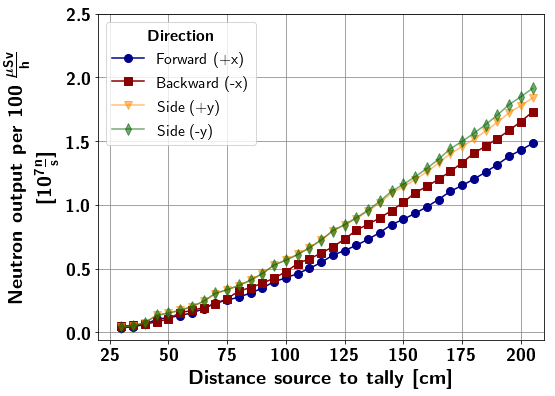

In [32]:
fig = plt.figure(figsize=(8, 6))
fs = 20
markersize = 8
scale_y = 1e7
# North
plt.plot(df.index, df['N']/scale_y, marker='o', color='darkblue', markersize=markersize, label=r'Forward (+x)')
# South
plt.plot(df.index, df['S']/scale_y, marker='s', color='darkred', markersize=markersize, label=r'Backward (-x)')
# West
plt.plot(df.index, df['W']/scale_y, marker='v', color='darkorange', markersize=markersize, label=r'Side (+y)', alpha=0.55)
# East
plt.plot(df.index, df['E']/scale_y, marker='d', color='darkgreen', markersize=markersize, label=r'Side (-y)', alpha=0.55)


ax1 = plt.gca()
# plt.yscale('log')
# take the same ylim as in the previous graph
ylim = ax1.get_ylim()

plt.xlim(20, 210)
plt.ylim(ylim[0], 2.5)

plt.ylabel(r"\textbf{Neutron output per 100} $ \frac{\mu Sv}{h}$" + '\n' + r'$ [10^7 \frac{n}{s}] $', fontsize=fs)
plt.xlabel(r"\textbf{Distance source to tally [cm]}", fontsize=fs)

ax1.tick_params('x', colors='black', labelsize=fs-2)
ax1.tick_params('y', colors='black', labelsize=fs-2)
plt.grid(which="minor",ls="--", color='0.65')
plt.grid(which="major",ls="-", color='0.55')
leg = plt.legend(fontsize=fs-4)
leg.set_title(r"\textbf{Direction}", prop = {'size': fs-4})
plt.show()